In [5]:
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import json
import statsmodels.stats.diagnostic as st

In [2]:
data_file = 'Providence_Pokemon.xls'
df = pd.read_excel(io=data_file)

In [47]:
df.head(10) # just getting a sense of what it looks like

,Coordinate x,Coordinate y,Point Value,Time arriving
0,3,1,12,0
1,7,2,6,34
2,10,6,4,70
3,4,10,3,104
4,8,3,1,140
5,9,7,1,170
6,8,8,4,203
7,9,2,2,222
8,1,8,3,257
9,10,1,2,285


# poke spawn time stuff:

mean: 30.25312656328164
std: 9.223041321879801


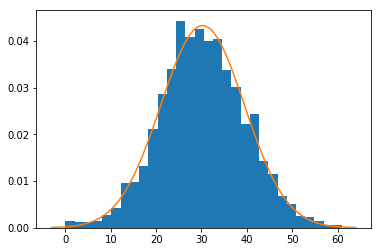

In [3]:
df_poke_spawn_times = df['Time arriving']

df_time_delta = (df_poke_spawn_times-df_poke_spawn_times.shift()).fillna(0)

time_delta_list = df_time_delta.tolist()

mean, std = norm.fit(time_delta_list)
print('mean: ' + str(mean))
print('std: ' + str(std))

plt.hist(time_delta_list, bins=30, density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y)
plt.xlabel = 'spawn time'
plt.ylabel = 'num occurences'
plt.savefig('images/gauss_fit.png')
plt.show()

In [8]:
kstat, pval = st.lilliefors(time_delta_list, 'norm')
print(pval)

0.03376406352578465
1.6236982441931747e-05


# poke spawn dist stuff:

<IPython.core.display.Javascript object>


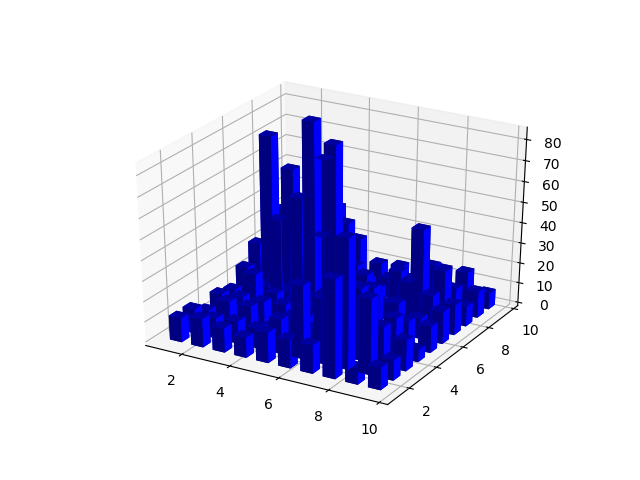

In [54]:
# run this cell again to make the plot interactive
%matplotlib notebook 

x = df['Coordinate x']
y = df['Coordinate y']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

hist, xedge, yedge = np.histogram2d(x, y, bins=10, range=[[1,10], [1,10]])

xpos, ypos = np.meshgrid(xedge[:-1] + 0.1, yedge[:-1] + 0.1)
xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
zpos = np.zeros_like(xpos)

dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()
dz = hist.flatten()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')

plt.show()

In [51]:
# find highest weight in row
weight_file = 'xy_weights.xlsx'
df_2 = pd.read_excel(io=weight_file)


for i, row in df_2.iterrows():
    print(row.values.argmax())
print(df_2)

7
7
7
7
6
1
1
1
1
5
         1         2         3         4         5         6         7   \
0  0.006003  0.006003  0.003502  0.005503  0.004502  0.008004  0.012006   
1  0.007004  0.005003  0.007004  0.006003  0.009505  0.004502  0.019010   
2  0.006003  0.005503  0.007004  0.006003  0.006003  0.004502  0.025513   
3  0.005003  0.005003  0.003002  0.006503  0.005503  0.004502  0.017009   
4  0.007504  0.008504  0.007004  0.004502  0.005003  0.004002  0.009005   
5  0.007004  0.018009  0.005003  0.006503  0.010005  0.009505  0.010005   
6  0.007004  0.016008  0.004002  0.009505  0.007004  0.008504  0.004002   
7  0.024012  0.031516  0.017509  0.015508  0.004002  0.007504  0.010505   
8  0.004002  0.018509  0.009505  0.009505  0.006503  0.005003  0.008504   
9  0.005503  0.005003  0.007504  0.003002  0.006503  0.008004  0.007504   

         8         9         10  
0  0.036518  0.016508  0.004002  
1  0.029515  0.020010  0.008004  
2  0.042021  0.031016  0.017509  
3  0.037519  0.016

In [99]:
fghij_1 = df_2.loc[5:9,[1]]
fghij_1 = fghij_1.sum(axis=0)[1]
fghij_2 = df_2.loc[5:9,[2]]
fghij_2 = fghij_2.sum(axis=0)[2]
fghij_3 = df_2.loc[5:9,[3]]
fghij_3 = fghij_3.sum(axis=0)[3]
fghij_4 = df_2.loc[5:9,[4]]
fghij_4 = fghij_4.sum(axis=0)[4]
h_extra = df_2.loc[7, 5:6]
h_extra = h_extra.sum(axis=0)
extra = df_2.loc[[6,8], [5]]
extra = extra.sum(axis=0)[5]
cum_sum = fghij_1 + fghij_2 + fghij_3 + fghij_4 + h_extra + extra
print(cum_sum)

0.24912456300000005


# poke point dist stuff:

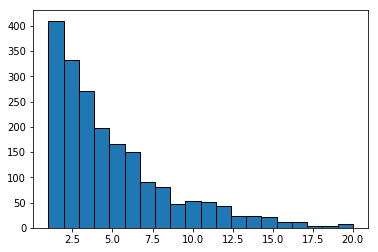

In [9]:
points = df['Point Value']
plt.hist(points, bins=20, ec='black')
plt.xlabel = 'Point Value'
plt.ylabel = 'Num Occurences'
plt.show()

In [10]:
kstat, pval = st.lilliefors(points, 'exp')
print(pval)

0.01


# eval stuff:

In [58]:
run_scores = []

for i in range(1,13):
    with open('run{0}.json'.format(i)) as json_file:
        data = json.load(json_file)
        run_scores.append(data['score'])


In [66]:
np.mean(run_scores)

17.166666666666668